In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
!which python

/Users/diegopiccinotti/opt/anaconda3/bin/python


In [3]:
budget = 1000
env = "RiverSwim"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]

In [4]:
df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw

,agent,total_reward,length,budget,type
0,dpw,50.0,11,1000,dpw
1,dpw,45.0,11,1000,dpw
2,dpw,40.0,11,1000,dpw
3,dpw,45.0,11,1000,dpw
4,dpw,45.0,11,1000,dpw
...,...,...,...,...,...
95,dpw,45.0,11,1000,dpw
96,dpw,45.0,11,1000,dpw
97,dpw,50.0,11,1000,dpw
98,dpw,45.0,11,1000,dpw


In [5]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]

#dfs = [df2.copy(deep=True) for _ in range(len(particles))]

#for i in range(len(particles)):
#    dfs[i]['Particles'] = [particles[i]] * dfs[i].shape[0]
    

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")


print(df3)

       agent  budget  length    return         seed  total_reward   type
449    10_pf    1000      11       NaN          NaN       45.0000     pf
472    10_pf    1000      11       NaN          NaN       45.0000     pf
471    10_pf    1000      11       NaN          NaN       45.0000     pf
470    10_pf    1000      11       NaN          NaN       45.0000     pf
469    10_pf    1000      11       NaN          NaN       50.0000     pf
...      ...     ...     ...       ...          ...           ...    ...
1371  random    1000      10  0.000377  965457055.0        0.0015  paper
1372  random    1000      10  0.000362  965457119.0        0.0015  paper
1373  random    1000      10  0.000000  965457130.0        0.0000  paper
1375  random    1000      10  0.000151  965457117.0        0.0010  paper
1349  random    1000      10  0.000650  965457054.0        0.0020  paper

[1500 rows x 7 columns]


/Users/diegopiccinotti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


Saving total_reward plot to RiverSwim/riverswim_total_reward_1000.png


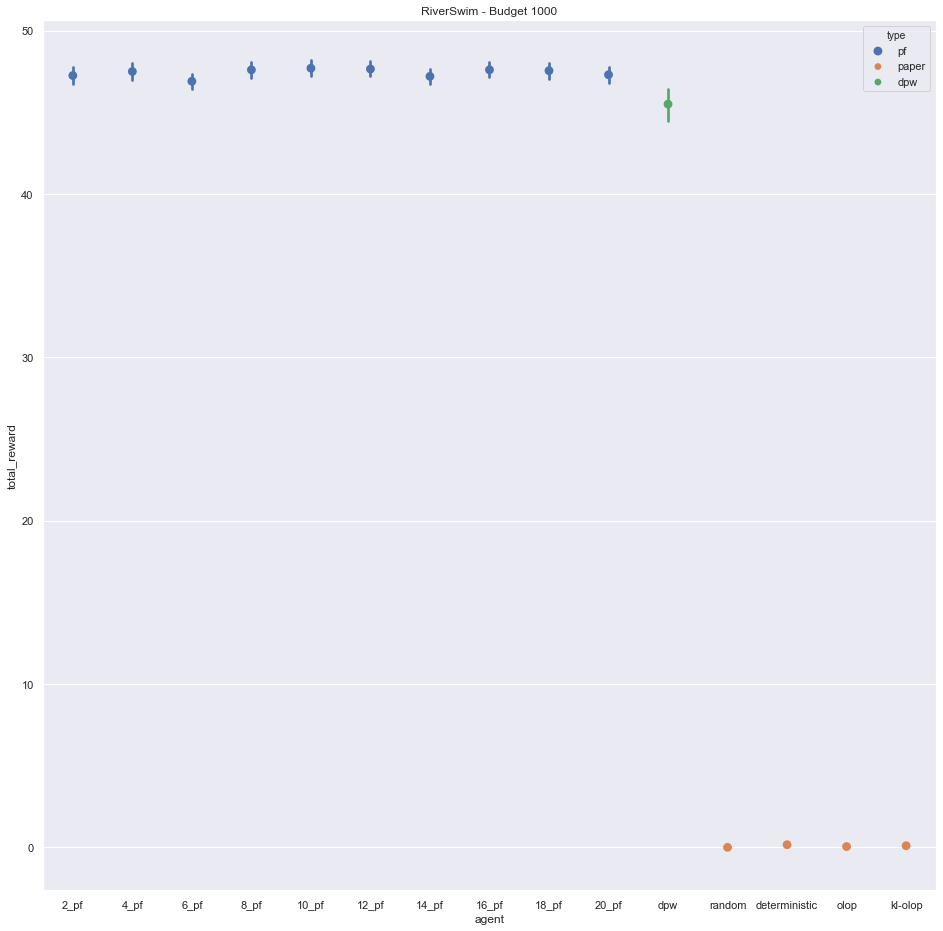

In [6]:
# print("Reading data from {}".format(data_path))
# df = pd.read_csv(data_path)
# df = df[~df.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
#df = df.sort_values(by="Particles")

for field in ["total_reward"]:
    #fig, ax = plt.subplots()
    sns.set(style="darkgrid")
    plt.figure(figsize=(16, 16))
    # ax.set(xscale="log")
    # sns.barplot(x="Particles", y="Cumulative reward", hue="Particles", data=df, dodge=False)
    #sns.pointplot(x="Particles", y="Cumulative reward", ax=ax, data=df, join=False, grid=True)
    plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                        order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
    #plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)
    
    plot.set_title("{} - Budget {}".format(env, budget))

    
    field_path = "{}/{}_{}_{}.png".format(env, env.lower(), field, budget)
    plot.get_figure().savefig(field_path, bbox_inches='tight')
    # plt.show()
    print("Saving {} plot to {}".format(field, field_path))